In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets('./Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/',one_hot=True)

Extracting ./Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
tf.reset_default_graph()

In [10]:
# 28x28 pixels per image = 784 inputs
# 1/2 of 784 = 392 inputs for the next layer
# 1/2 of 392 = 196 inputs for the next layer
# 392 inputs for next layer
#784 inputs for the next layer

In [11]:
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

In [12]:
learning_rate = 0.01

In [21]:
act_func = tf.nn.relu

In [22]:
x = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [23]:
initializer = tf.variance_scaling_initializer() #usually necessary when size of hidden layers is very different

In [24]:
# weights
w1 = tf.Variable(initializer([num_inputs,neurons_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1,neurons_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2,neurons_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3,num_outputs]),dtype=tf.float32)

In [25]:
# Biases
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [27]:
hid_layer1 = act_func(tf.matmul(x,w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+b4)

In [28]:
loss = tf.reduce_mean(tf.square(output_layer-x))

In [29]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [30]:
train = optimizer.minimize(loss)

In [31]:
init = tf.global_variables_initializer()

In [32]:
saver = tf.train.Saver()

In [33]:
num_epochs = 5 #each epoch is one full run through training data
batch_size = 150

In [35]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples // batch_size # // means don't get a decimal
        for iteration in range(num_batches):
            x_batch,y_batch = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict = {x:x_batch})
        training_loss = loss.eval(feed_dict={x:x_batch})
        print("Epoch: {} Loss: {}".format(epoch,training_loss))
    saver.save(sess,'./example_stacked_autoencoder.ckpt')

Epoch: 0 Loss: 0.028804836794734
Epoch: 1 Loss: 0.02613333985209465
Epoch: 2 Loss: 0.024807825684547424
Epoch: 3 Loss: 0.024893784895539284
Epoch: 4 Loss: 0.025244269520044327


In [36]:
#the autoencoder was successful if the images look similar to the original images
num_test_images = 10
with tf.Session() as sess:
    saver.restore(sess,'./example_stacked_autoencoder.ckpt')
    results = output_layer.eval(feed_dict={x:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


In [37]:
results

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

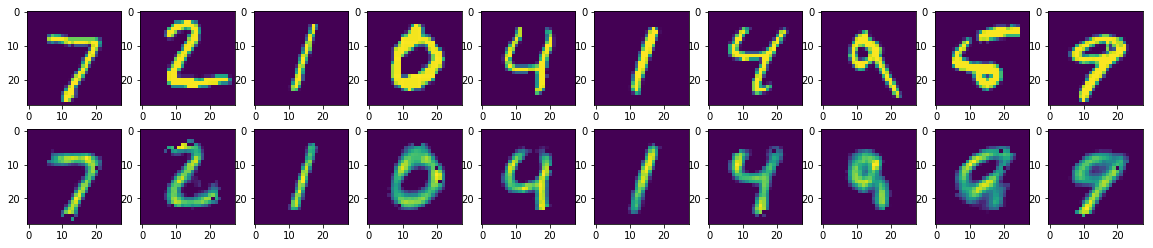

In [38]:
# comaring the original images with their reconstructions
f,a = plt.subplots(2,10,figsize=(20,4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28))) #the top row are the original images
    a[1][i].imshow(np.reshape(results[i],(28,28))) #the bottom row are the reconstructed images